<h2> Ejercicio 101 Cinemática en un robot móvil</h2>

<br>- Requiere que los archivos 'sim.py', 'simConst.py', 'remoteapi.dll' estén alojados en la misma carpeta que este cuaderno de Jupyter. Teneis en la carpeta adjunta a la sesión estos archivos.
<br>- Requiere tener el Robot movil de la escena ejercicio102.ttt. 


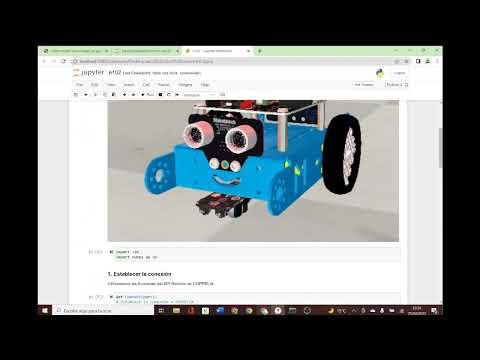

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('GltV3XSKXdI') 

<h3> Ejercicio 101</h3>
Usando el escenario en CoppeliaSIM de un Robot móvil de la figura siguiente, prueba su funcionamiento.

![title](img102.png)


### 1. Establecer la conexión
Utilizaremos las funciones del API Remoto de COPPELIA.


In [2]:
import coppeliasim_zmqremoteapi_client
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import numpy as np

def connect(port=23000):
    try:
        client = RemoteAPIClient('127.0.0.1', port)
        print(f"Connected to CoppeliaSim on port {port}")
        return client
    except Exception as e:
        print(f"Could not connect to CoppeliaSim on port {port}: {e}")
        return None

client = connect()
sim = client.getObject('sim')


Connected to CoppeliaSim on port 23000


<h3> 2. Obtener los controladores (handlers)</h3>
Un controlador (handler) es un número identificador que asigna Coppelia para cada uno de los elementos de la escena.

In [3]:
# Obtenemos los controladores para cada eje de las ruedas y el ultrasonido
#ret,WR=sim.simxGetObjectHandle(clientID,'Wheel_Right_Joint',sim.simx_opmode_blocking)
#ret,WL=sim.simxGetObjectHandle(clientID,'Wheel_Left_Joint',sim.simx_opmode_blocking)
#ret,Ultrasonic=sim.simxGetObjectHandle(clientID,'mBot_ultrasonic_sensor',sim.simx_opmode_blocking)

WR = sim.getObject('/wheel_right_joint')
WL = sim.getObject('/wheel_left_joint')


print(WR, WL)

18 16


<h3> 3. Movemos el robot</h3>
Utilizando los controladores, podemos enviar parámetros a los elementos.

In [5]:
import time
velocidad = 0.1
time.sleep(3)



#Avanzar hacia delante durante 3 segundos:

# ---- Modificado código para adaptar a ZeroMQ ------------ Ejemplo:
#sim.simxSetJointTargetVelocity(clientID, WR,velocidad,sim.simx_opmode_streaming)
#sim.simxSetJointTargetVelocity(clientID, WL,velocidad,sim.simx_opmode_streaming)
sim.setJointTargetVelocity(WR, velocidad)
sim.setJointTargetVelocity(WL, velocidad)
time.sleep(3)
#Retroceder hacia atras durante 3 segundos:
sim.setJointTargetVelocity(WR, -velocidad)
sim.setJointTargetVelocity(WL, -velocidad)
time.sleep(3)
#Girar hacia la derecha durante 3 segundos:
sim.setJointTargetVelocity(WR, -velocidad)
sim.setJointTargetVelocity(WL, velocidad)
time.sleep(3)
#Parar:
sim.setJointTargetVelocity(WR, 0)
sim.setJointTargetVelocity(WL, 0)
time.sleep(3)

<h3> Ejercicio a realizar </h3>

Realiza un nuevo Robot usando dos ruedas locas "Caster wheel" que aparece en la carpeta de componentes y dos ruedas motoras creadas mediante ejes y cilindros, tal y como se ven en la figura: 

![title](img102b.png)

Junta los ejes de las ruedas a una base (pude ser tipo Cuboid), añade un sensor de proximidad tipo cónico y ajusta su volumen y detección.


<h3> Realizar el código para mover este Robot y detectar obstáculos mediante el sensor de proximidad. </h3>

 Se ha de entregar la escena, el código en Jupyter Notebook i un Video.




